# Assignment 3 - Linear Dynamical Systems & Matrix Manipulation
### Modeling & Optimization
### Ethan Witkowski

## Problem 1

### a)

$x_{t+1} = A_{t}x_{t}$

$A_{t} = $
$ \left(\begin{array}{cc} 
.90 & 0 & .05\\ 
.10 & .95 & 0\\
0 & 0.05 & .90
\end{array}\right)
$

### b)

In [31]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#Declare A matrix
A = np.matrix([[.90, 0, .05], \
                [.10, .95, 0], \
                [0, 0.05, .90]])

In [47]:
#Function to iterate x to next state using matrix A

def update_x(x_current):
    
    x_next = A*x_current
    
    return x_next

In [48]:
#Function to iterate x over specified time

def comp_sys(time_iter, x_current):
    
    for iter in range(time_iter):
        
        #Run update_x using the final element in each x_current column
        x_next = update_x(x_current[:,-1])
        
        #Concatenate most current x-state to x_current
        x_current = np.concatenate((x_current, x_next), axis=1)
        
    x_final = x_current[:,-1]
    print(x_final)
    
    return x_final,x_current

In [49]:
#Input initial x-state and final time iteration
x_current = np.matrix([[1],
                       [0],
                       [0]])

time_iter = 50

In [50]:
#Simulate compartmental system

x_final, x_current = comp_sys(time_iter, x_current)

[[0.10302636]
 [0.3026031 ]
 [0.1779073 ]]


### c)

<function matplotlib.pyplot.show(*args, **kw)>

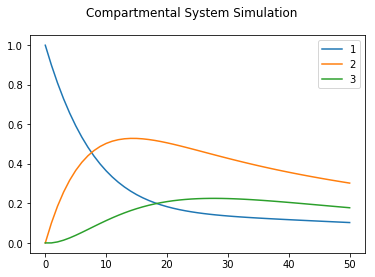

In [51]:
#Plot linear dynamical system

plt.figure()
for i in range(x_current.shape[0]):
    plt.plot(np.transpose(x_current[i,:]), label = i+1)
    
plt.legend()
plt.suptitle('Compartmental System Simulation')

plt.show

### d)

In [64]:
#Function 

def iter_count(x_current):
    
    counter = 0
    while x_current[0,-1] > .05:
        
        #Run update_x using the final element in each x_current column
        x_next = update_x(x_current[:,-1])
        
        #Concatenate most current x-state to x_current
        x_current = np.concatenate((x_current, x_next), axis=1)
        
        counter += 1
        
    x_final = x_current[:,-1]
    print(x_final)
    
    return x_final,x_current,counter

In [65]:
#Re-initialize x
x_current = np.matrix([[1],
                       [0],
                       [0]])

In [66]:
#Call iteration count function

x_final,x_current,counter = iter_count(x_current)
print('It takes ' + str(counter) + ' iterations for compartment 1 to reach 5% of its original value')

[[0.04937598]
 [0.14194729]
 [0.08371693]]
It takes 99 iterations for compartment 1 to reach 5% of its original value


### d)

## Problem 2

### a)

$z_{t} = A_{t}z_{t} + c$ <br>
$Iz_{t} = A_{t}z_{t} + c$ <br>
$Iz_{t} -  A_{t}z_{t}  = c$ 
<br>

$z_{t}(I - A) = c$ 
<br>


$(I - A)^{-1}c = z_{t}$

### b)

In [9]:
#Function to find equilibrium value z

def equil_z(A,c):
    
    Iden_A = np.identity(len(A))
    
    #Take inverse of A matrix subtracted from Identity matrix
    inv_I_A = np.linalg.inv(Iden_A - A)
    
    z = inv_I_A.dot(c)
    
    return z  

In [10]:
#Function to iterate x to next state using matrix A and constant c

def update_z(z_current):
    
    z_next = (np.matmul(A,z_current) + c)
    
    return z_next

In [11]:
#Function to iterate z over specified time

def equil_test(time_iter, z_current):

    #Pre-allocate cumulative z vector
    z_track = z_current

    for iter in range(time_iter):

        #Run update_x using the final element in each x_current column
        z_next = update_z(z_current)

        #Concatenate most current x-state to x_current
        z_track = np.concatenate((z_track, z_next), axis=1)

        #Set z_next as z
        z_current = z_next

    z_final = z_current
    print(z_final)

    return z_final,z_track

#### 1st Test - A,c

In [12]:
#Declare A matrix, c offset vector, and number of iterations
A = np.array([[2,4],[3,5]])
c = np.array([[2],[1]])
time_iter = 3

In [13]:
#Equilibrium z value
z_current = equil_z(A,c)

In [14]:
print(z_current)
#Checked - the output of equilibrium is correct to the formula

[[ 0.5  ]
 [-0.625]]


In [15]:
#Iterate Equilibrium value (1)

#Call function
z_final, z_current = equil_test(time_iter, z_current)

[[ 0.5  ]
 [-0.625]]


<function matplotlib.pyplot.show(*args, **kw)>

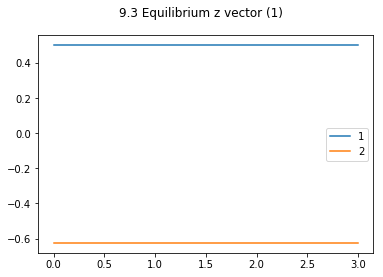

In [16]:
#Plot

plt.figure()
for i in range(z_current.shape[0]):
    plt.plot(np.transpose(z_current[i,:]), label = i+1)
    
plt.legend()
plt.suptitle('9.3 Equilibrium z vector (1)')

plt.show

#### 2nd Test - A,c

In [17]:
#Declare A matrix, c offset vector, and number of iterations
A = np.array([[6,1],[9,20]])
c = np.array([[3],[8]])
time_iter = 3

In [18]:
#Equilibrium z value
z_current = equil_z(A,c)

In [19]:
print(z_current)
#Checked - the output of equilibrium is correct to the formula

[[-0.56976744]
 [-0.15116279]]


In [20]:
#Iterate Equilibrium value (1)

#Call function
z_final, z_current = equil_test(time_iter, z_current)

[[-0.56976744]
 [-0.15116279]]


<function matplotlib.pyplot.show(*args, **kw)>

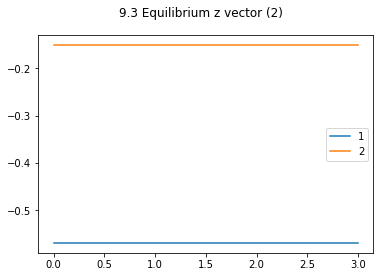

In [21]:
#Plot

plt.figure()
for i in range(z_current.shape[0]):
    plt.plot(np.transpose(z_current[i,:]), label = i+1)
    
plt.legend()
plt.suptitle('9.3 Equilibrium z vector (2)')

plt.show

#### 3rd Test, A,c

In [22]:
#Declare A matrix, c offset vector, and number of iterations
A = np.array([[540,20],[234,90]])
c = np.array([[23],[5]])
time_iter = 3

In [23]:
#Equilibrium z value
z_current = equil_z(A,c)

In [24]:
print(z_current)
#Checked - the output of equilibrium is correct to the formula

[[-0.04497471]
 [ 0.06206833]]


In [25]:
#Iterate Equilibrium value (1)

#Call function
z_final, z_current = equil_test(time_iter, z_current)

[[-0.04497471]
 [ 0.06206833]]


<function matplotlib.pyplot.show(*args, **kw)>

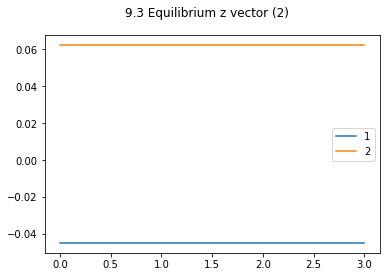

In [26]:
#Plot

plt.figure()
for i in range(z_current.shape[0]):
    plt.plot(np.transpose(z_current[i,:]), label = i+1)
    
plt.legend()
plt.suptitle('9.3 Equilibrium z vector (2)')

plt.show

## Problem 3

Given:

$x_{t+1} = A_{1}x_{t} + A_{2}x_{t-1}$

Reduction to linear dynamical system:

$z_{t+1} = $
$\left(\begin{array}{cc} 
A_{00}^{1} & A_{01}^{1} & A_{00}^{2} & A_{01}^{2}\\ 
A_{10}^{1} & A_{11}^{1} & A_{10}^{2} & A_{11}^{2}\\
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0
\end{array}\right)
$
$\left(\begin{array}{cc} 
x_{t}^{0}\\
x_{t}^{1}\\
x_{t-1}^{0}\\
x_{t-1}^{1}
\end{array}\right)
$


## Problem 4

### 10.6)

$A = $
$\left(\begin{array}{cc} 
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{array}\right)
$

$B = $
$\left(\begin{array}{cc} 
\cos\omega & -\sin\omega\\
\sin\omega & \cos\omega
\end{array}\right)
$

$AB =$
$\left(\begin{array}{cc} 
(\cos\theta \cos\omega) + (-\sin\theta \sin\omega) & (-\sin\omega \cos\theta) + (-\sin\theta \cos\omega)\\
(\sin\theta \cos\omega) + (\cos\theta \sin\omega) & (-\sin\omega \sin\theta) + (\cos\theta \cos\omega)
\end{array}\right)
$

<br>

Using Ptolemy's identities:


$\cos(\alpha + \beta) = \cos\alpha \cos\beta - \sin\alpha \sin\beta$

$\sin(\alpha + \beta) = \sin\alpha \cos\beta + \cos\alpha \sin\beta$

<br>

We find:


$AB = $
$\left(\begin{array}{cc} 
\cos(\theta+\omega) & -\sin(\theta+\omega)\\
\sin(\theta+\omega) & \cos(\theta+\omega)
\end{array}\right)
$


Therefore, AB a rotation matrix, and it will rotate vectors by the angle $\theta + \omega$

<br>

$BA = $
$\left(\begin{array}{cc} 
(\cos\theta \cos\omega) + (-\sin\theta \sin\omega) & (-\sin\omega \cos\theta) + (-\sin\theta \cos\omega)\\
(\sin\theta \cos\omega) + (\cos\theta \sin\omega) & (-\sin\omega \sin\theta) + (\cos\theta \cos\omega)
\end{array}\right)
$
$ = $
$\left(\begin{array}{cc} 
\cos(\theta+\omega) & -\sin(\theta+\omega)\\
\sin(\theta+\omega) & \cos(\theta+\omega)
\end{array}\right)
$
$ = $
$ AB$

In simple terms, BA = AB because the corresponding elements in A and B contain the same function.

### 10.10)

$D = diag(p)Q$

### 10.18)

a)
<br>

$E_{i} = C^{T} \cdot \overrightarrow{1}$

b)
<br>



$S_{i,j} = C^{T}M$


### 10.44)

a)
<br>

With dimensions:
<br>

m=10, n=1000, p=10, q=1000, r=100
<br>

$E = ABCD$
<br>
$Flops \approx nmp + pqm + qrm = (1000 * 10 * 10) + (10 * 1000 * 10) + (1000 * 100 * 10) = (100000 + 100000 + 1000000) = 1,200,000$

$E = (AB)(CD)$
<br>
$Flops \approx nmp + qrp + pmr = (1000 * 10 * 10) + (1000 * 100 * 10) + (10 * 10 * 100) = (100000 + 1000000 + 10000) = 1,110,000$

$E = A(BC)D$
<br>
$Flops \approx pnq + nmq + qmr = (10 * 1000 * 1000) + (1000 * 10 * 1000) + (1000 * 10 * 100) = (10000000 + 10000000 + 1000000) = 21,000,000$

$E = A((BC)D)$
<br>
$Flops \approx pnq + qnr + nmr = (10 * 1000 * 1000) + (1000 * 1000 * 100) + (1000 * 10 * 100) = (10000000 + 100000000 + 1000000) = 111,000,000$

$E = A(B(CD))$
<br>
$Flops \approx qpr + pnr + nmr = (1000 * 10 * 100) + (10 * 1000 * 100) + (1000 * 10 * 100) = (1000000 + 1000000 + 1000000) = 3,000,000$
<br>

b)
<br>

The matrix multiplication with least complexity is E = (AB)(CD) with 1,100,000 flops

## Problem 5

Given: $\|I\| = n$
<br>

$I = AA^{-1}$
<br>

$\|I\| = \|A\|\|A^{-1}\|$
<br>

$n = \|A\|\|A^{-1}\|$
<br>

$\|A^{-1}\| = \cfrac{n}{\|A\|}$
<br>

Therefore:
<br>

$\|A^{-1}\| \geq  \cfrac{\sqrt{n}}{\|A\|}$
<br>


## Problem 6

### 12.4)

a)
<br>

$B_{m \times n} = D_{m \times m}A_{m \times n}$
<br>

$(Bx)_{n \times 1} = B_{m \times n}x_{n \times 1}$
<br>

$d_{n \times 1} = D_{m \times m}b_{n \times 1}$
<br>

$f(x) = \|(Bx - d)_{n \times 1}\|^{2}$
<br>

$\nabla f(\hat{x})_{n \times 1} = 2(Bx - d)^{T}B = 0$
<br>

$\hat{x} = (B^{T}B)^{-1}B^{T}d$
<br>

b)
<br>

A matrix contains linearly independent columns if no column can be represented as a linear combination of the others. Assuming 
$A$ is linearly independent, a multiplication by a diagonal matrix ($DA$) will not change the status of the linear independence 
of the resultant matrix's columns -- this is because each row/column will just be multiplied by a scalar.
<br>

c)
<br>

Substituting $W = D$ from part a), 
<br>

$\hat{x} = (B^{T}B)^{-1}B^{T}d$

### 12.5)

Given: $A^{\dagger} = (A^{T}A)^{-1}A^{T}$
<br>

$AX = I$
<br>

$AX - I = R$
<br>

Minimize: $\|AX - I\|^{2}$
<br>

$f(x) = \|AX - I\|^{2}$
<br>

$\nabla f(x) = 2(AX - I)^{T}A$
<br>

$(A\hat{X} - I)^{T}A = 0$
<br>

$A^{T}(A\hat{X} - I) = 0$
<br>

$A^{T}A\hat{X} - A^{T}I = 0 = A^{T}A\hat{X} - A^{T}$
<br>

$A^{T}A\hat{X} = A^{T}$
<br>

$X = (A^{T}A)^{-1}A^{T} = A^{\dagger}$